In [1]:
pip install pandas matplotlib seaborn plotly openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file_path = "C:/Users/ADMIN/Documents/datasets/superstore_final_dataset (1).csv"

In [5]:
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.isnull().sum()
df.dropna(inplace=True)

In [9]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')

In [10]:
total_sales = df['Sales'].sum()
print("Total Sales: $", round(total_sales, 2))

Total Sales: $ 2252607.41


In [11]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24 Color                       18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


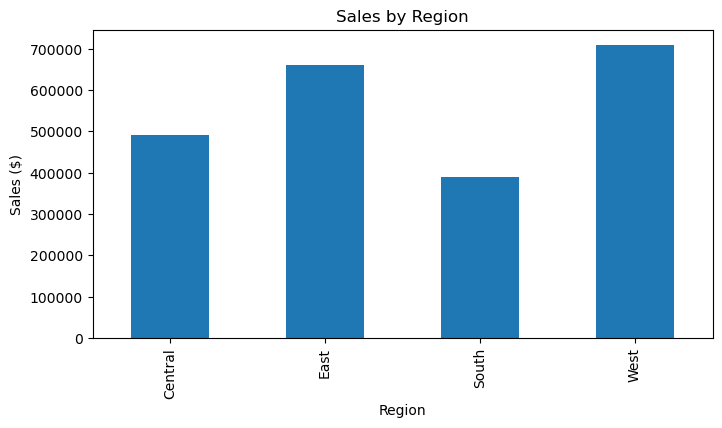

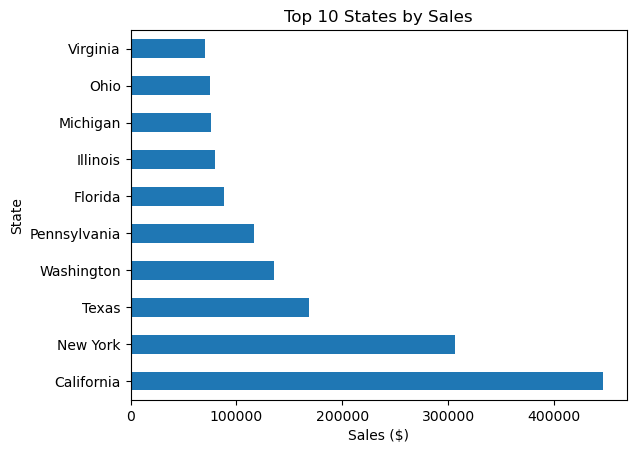

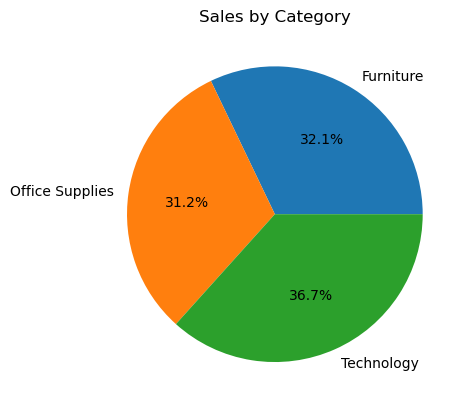

In [12]:
df.groupby('Region')['Sales'].sum().plot(kind='bar', title='Sales by Region', figsize=(8, 4))
plt.ylabel("Sales ($)")
plt.show()
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 States by Sales')
plt.xlabel("Sales ($)")
plt.show()
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.ylabel("")
plt.show()

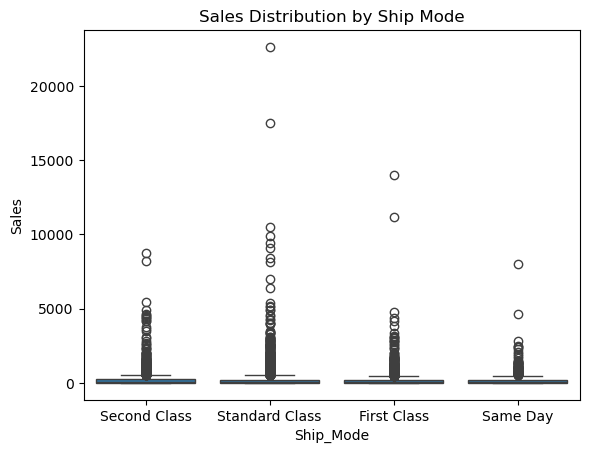

In [14]:
sns.boxplot(x='Ship_Mode', y='Sales', data=df)
plt.title('Sales Distribution by Ship Mode')
plt.show()

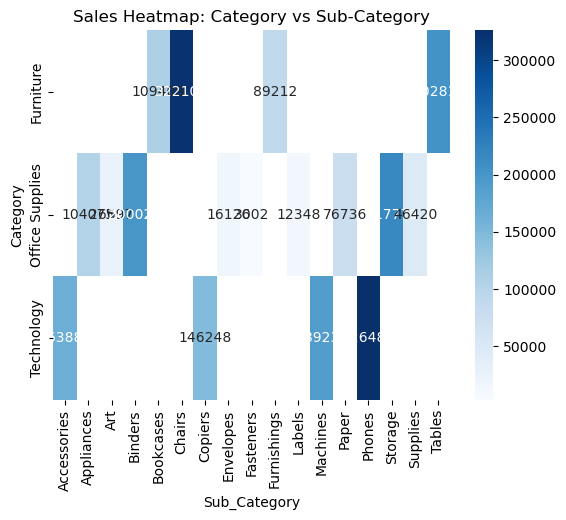

In [15]:
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Sub_Category', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title("Sales Heatmap: Category vs Sub-Category")
plt.show()

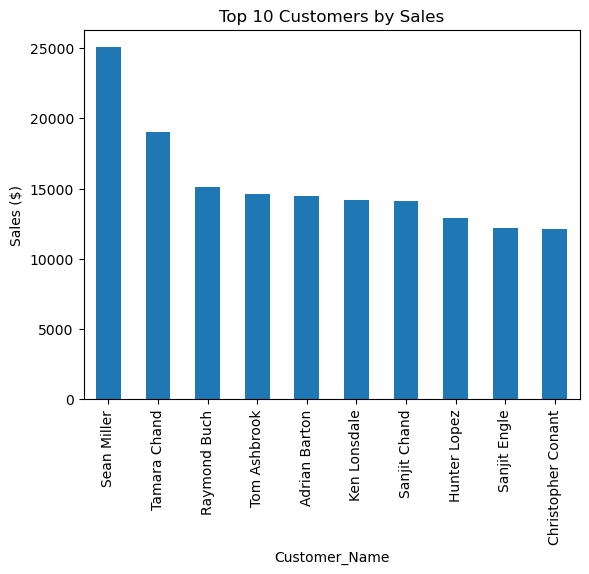

In [16]:
top_customers = df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales')
plt.ylabel('Sales ($)')
plt.show()

In [17]:
df.to_csv("C:/Users/ADMIN/Documents/datasets/superstore_final_dataset (1).csv", index=False)